In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from math import exp
import matplotlib.pyplot as plt

### Function for simple "x vs. y" plots.

In [2]:
def simple_plot(x, y):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.grid()

### 1. Linear Reservoir with Zero initial storage. Constant endless inflow. Analytical Solution.


In [3]:
def simple_linear_reservoir_analytical(A, P, K, time_steps):
    '''
    A - watershed area (m2),
    P - constant precipitation rate, (m/h),
    K - response factor (h),
    time_steps - array of time steps(h).
    '''
    I = P * A # inflow = Precipitation rate * Watershed Area [m3/hour]
    steps_num = len(time_steps)
    Q_outflow = np.empty(steps_num)
    for i in range(steps_num):
        t = time_steps[i]
        Q_t = I * (1 - exp(-t/K))
        Q_outflow[i] = Q_t
    return Q_outflow

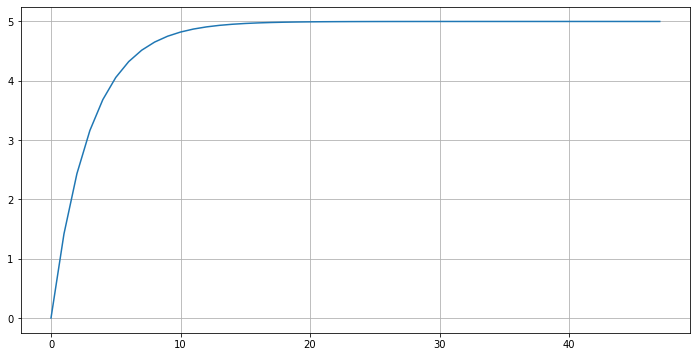

In [4]:
S = 0 # m3, empty reservoir
A = 1000 # m2
K = 3 # hours
time_steps = np.arange(0.0, 48.0, 1.0) # generating output time_steps ~ two days = 48 hours
P = 5 # precipitation rate, mm/hour
P = P / 1000.0 # conversion to m/hour

Q_outflow = simple_linear_reservoir_analytical(A, P, K, time_steps)
simple_plot(time_steps, Q_outflow)

### 2. Linear Reservoir with Zero initial storage. Constant inflow till some point in time. Analytical Solution.

In [5]:
def linear_reservoir_analytical(A, P, K, time_steps, dt):
    '''
    A - watersged area (m2),
    P - constant precipitation rate, (m/h),
    K - response factor (h),
    time_steps - array of time step (h),
    dt - time step (h).
    '''
    steps_num = len(time_steps)
    Q_outflow = np.empty(steps_num)
    for i in range(steps_num):
        I = P[i] * A
        t = time_steps[i]
        if I > 0:
            Q_t = I * (1 - exp(-t/K))
        else:
            Q_t = Q_outflow[i-1] * exp(-dt/K)

        Q_outflow[i] = Q_t
    return Q_outflow

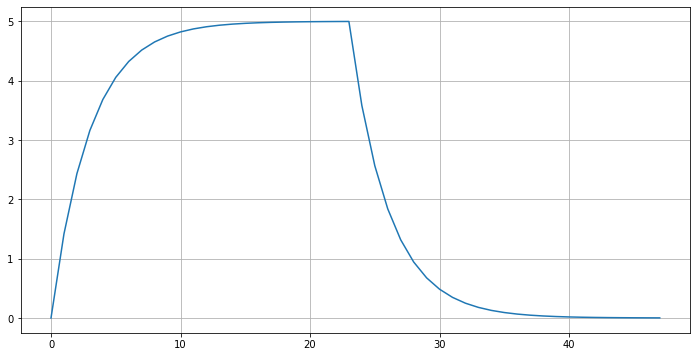

In [6]:
S = 0 # m3, empty reservoir
A = 1000 # m2
K = 3 # hours
dt = 1 # time step in hours
time_steps = np.arange(0.0, 48, dt) # generating output time_steps

P = np.empty(len(time_steps)) # precipitation rate, mm/hour
P[0:24] = 5.0
P[24:] = 0.0
P = P / 1000.0 # conversion to m/hour

Q_outflow = linear_reservoir_analytical(A, P, K, time_steps, dt)
simple_plot(time_steps, Q_outflow)

### 3. General analytical solution for Linear Reservoir.

In [7]:
def general_linear_reservoir_analytical(A, P, K, S_0, dt):
    '''
    A - watersged area (m2),
    P - timeseries of precipitation rates, (m/h),
    K - response factor (h),
    S_0 - initial water volume in reservoir, (m3)
    dt - time step (h).
    '''    
    steps_num = len(P)
    S = np.empty(steps_num)
    Q = np.empty(steps_num)
    for i in range(steps_num):
        I = P[i] * A
        S_t = K * I + (S_0 - K * I) * exp(-dt/K)
        Q_t = (S_0 + I - S_t)/dt
        S[i] = S_t
        Q[i] = Q_t
        S_0 = S_t
    return S, Q

### Reading text file with precipitation series

In [8]:
prec_file = "Precip.dat"
prec_df = pd.read_table(prec_file)
prec_arr = prec_df.values

### Computations

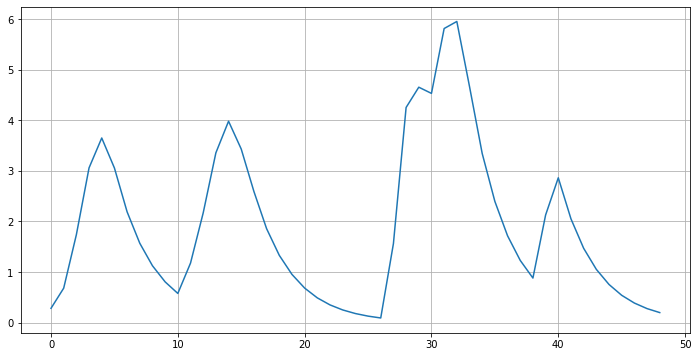

In [9]:
S_0 = 1 # m3
A = 1000 # m2
dt = 1 # hours
K = 3 # hours
prec_arr = prec_arr / 1000.0 # conversion to m/hour

S, Q_outflow = general_linear_reservoir_analytical(A, prec_arr, K, S_0, dt)

steps_num = len(prec_arr)
time_steps_arr = np.arange(steps_num)
simple_plot(time_steps_arr, Q_outflow)


### Checking water balance

In [10]:
balance_analytical = (np.sum(Q_outflow)*dt + S[-1])/(np.sum(prec_arr)*A + S_0)
print(balance_analytical)

1.0


In [12]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

K_samples = [0.2, 0.5, 0.7, 1.0, 1.2, 1.5, 2.0, 3.0, 4.0]

# Exercise!
# 1. Calculate S and Q_outflow for all values of K from K_samples
# 2. Plot all nine Q_outflow series using command: ax.plot(Q_outflow, label= <value of K>)

legend = ax.legend()
ax.grid()